# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)

#cities=cities[:20]
#print(f'{cities}')

In [33]:
print(f'{len(cities)}')

599


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
# Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# set up lists to hold reponse info
cloud=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
# Hold the name of not found city 
cityna=[]
# Begin the log of data retrival
print(f"Beginning Data Retrieval\n---------------")
# Loop through the list of cities and perform a request for data on each  
j=1
i=0
#n=0

for city in cities:
    
    try:
        # Build query URL
        url=f'{base_url}&appid={api_key}&q={city}&units={units}'
        # Get weather data
        wx_data=requests.get(url).json() 
        # Print the log data
        print(f'Processing Record {i} of Set {j} | {wx_data["name"]}')
        # Add or store data to place holder
        cloud.append(wx_data["clouds"]["all"])
        country.append(wx_data["sys"]["country"])
        date.append(wx_data["dt"])
        humidity.append(wx_data["main"]["humidity"])
        lat.append(wx_data["coord"]["lat"])
        lng.append(wx_data["coord"]["lon"])
        max_temp.append(wx_data["main"]["temp_max"])
        wind_speed.append(wx_data["wind"]["speed"])
        #n+=1
    except KeyError:
        # Add name of not found city
        cityna.append(city)
        # Print the log data
        print("City not found, Skipping...")
        #del cities[n]
    # Number increament of Data set
    i+=1
    if i < 50:
        j=j
    else:
        j+=1
        i=0
              

Beginning Data Retrieval
---------------
Processing Record 0 of Set 1 | Vaini
Processing Record 1 of Set 1 | Rikitea
Processing Record 2 of Set 1 | Kaitong
Processing Record 3 of Set 1 | Kondagaon
Processing Record 4 of Set 1 | Ushuaia
Processing Record 5 of Set 1 | Longyearbyen
Processing Record 6 of Set 1 | Svetlogorsk
Processing Record 7 of Set 1 | Airai
Processing Record 8 of Set 1 | Punta Arenas
Processing Record 9 of Set 1 | Port Hardy
Processing Record 10 of Set 1 | Hurricane
Processing Record 11 of Set 1 | Lompoc
Processing Record 12 of Set 1 | Barrow
Processing Record 13 of Set 1 | Coahuayana
Processing Record 14 of Set 1 | Sibolga
City not found, Skipping...
Processing Record 16 of Set 1 | Port Blair
Processing Record 17 of Set 1 | Hermanus
City not found, Skipping...
Processing Record 19 of Set 1 | Saint-Philippe
City not found, Skipping...
Processing Record 21 of Set 1 | Fairview
Processing Record 22 of Set 1 | Inuvik
Processing Record 23 of Set 1 | Bakchar
Processing Recor

Processing Record 6 of Set 5 | Afsin
Processing Record 7 of Set 5 | Pobe
Processing Record 8 of Set 5 | Myskhako
Processing Record 9 of Set 5 | Nome
Processing Record 10 of Set 5 | Novoagansk
Processing Record 11 of Set 5 | Namibe
Processing Record 12 of Set 5 | Puerto Ayora
Processing Record 13 of Set 5 | Datong
Processing Record 14 of Set 5 | Sao Filipe
Processing Record 15 of Set 5 | Opuwo
Processing Record 16 of Set 5 | Kimbe
Processing Record 17 of Set 5 | Faya
Processing Record 18 of Set 5 | Tamiahua
Processing Record 19 of Set 5 | Bambous Virieux
Processing Record 20 of Set 5 | Alofi
Processing Record 21 of Set 5 | Ushibuka
Processing Record 22 of Set 5 | Ancud
Processing Record 23 of Set 5 | Gamba
Processing Record 24 of Set 5 | Gazanjyk
Processing Record 25 of Set 5 | Ixtapa
City not found, Skipping...
Processing Record 27 of Set 5 | Husavik
Processing Record 28 of Set 5 | Yumen
Processing Record 29 of Set 5 | Rock Sound
Processing Record 30 of Set 5 | Terenos
Processing Recor

Processing Record 14 of Set 9 | Zvishavane
Processing Record 15 of Set 9 | Sorong
Processing Record 16 of Set 9 | Sinnamary
City not found, Skipping...
Processing Record 18 of Set 9 | Tuatapere
Processing Record 19 of Set 9 | Lebu
Processing Record 20 of Set 9 | Hami
Processing Record 21 of Set 9 | Chitral
Processing Record 22 of Set 9 | Port Lincoln
Processing Record 23 of Set 9 | Ketchikan
Processing Record 24 of Set 9 | Araouane
City not found, Skipping...
Processing Record 26 of Set 9 | Beeville
Processing Record 27 of Set 9 | Lodja
Processing Record 28 of Set 9 | Jerantut
Processing Record 29 of Set 9 | Nortelandia
Processing Record 30 of Set 9 | Villanueva
Processing Record 31 of Set 9 | Bafq
Processing Record 32 of Set 9 | Panuco
Processing Record 33 of Set 9 | Poum
Processing Record 34 of Set 9 | Pindi Gheb
Processing Record 35 of Set 9 | Drovyanaya
Processing Record 36 of Set 9 | Ustupo
Processing Record 37 of Set 9 | Trairi
Processing Record 38 of Set 9 | Port Antonio
Process

In [35]:
# Check arry length
print(f'City   {len(cities)}')
print(f'Cloudiness   {len(cloud)}')
print(f'Country {len(country)}')
print(f'Date   {len(date)}')
print(f'Humidity   {len(humidity)}')
print(f'Lat   {len(lat)}')
print(f'Lng   {len(lng)}')
print(f'max_temp   {len(max_temp)}')
print(f'wind_speed   {len(wind_speed)}')

City   599
Cloudiness   531
Country 531
Date   531
Humidity   531
Lat   531
Lng   531
max_temp   531
wind_speed   531


In [36]:
# Remove City name not having response data
for delcity in cityna:
    i=0    
    for city in cities:
        if city == delcity:
            del cities[i]
            i+=1
        else:
            i+=1
# Check arry length  
print(f'City   {len(cities)}')
print(f'Cloudiness   {len(cloud)}')
print(f'Country {len(country)}')
print(f'Date   {len(date)}')
print(f'Humidity   {len(humidity)}')
print(f'Lat   {len(lat)}')
print(f'Lng   {len(lng)}')
print(f'max_temp   {len(max_temp)}')
print(f'wind_speed   {len(wind_speed)}')

City   531
Cloudiness   531
Country 531
Date   531
Humidity   531
Lat   531
Lng   531
max_temp   531
wind_speed   531


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
# create a data frame from cities, Cloudiness, Country, Date, Humidity, latitude, Longitude, Max Temp and Win Speed.
weather_dict = {
    "City": cities,
    "Cloudiness":cloud,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data=weather_data.dropna(how="any")
weather_data.to_csv(output_data_file, index=None, header=True)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,lat,Lng,Max Temp,Wind Speed
0,vaini,0,IN,1552925190,56,15.34,74.49,78.32,5.32
1,rikitea,88,PF,1552925109,100,-23.12,-134.97,78.05,20.13
2,kaitong,0,CN,1552925190,52,44.81,123.15,38.45,4.65
3,kondagaon,0,IN,1552925190,42,19.59,81.66,76.70,6.67
4,ushuaia,90,AR,1552924800,56,-54.81,-68.31,41.00,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

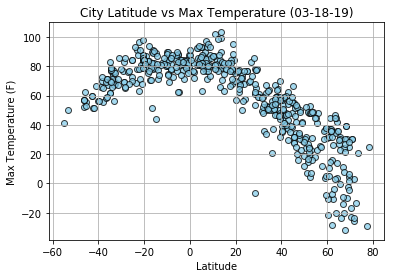

In [47]:
# Latitude vs. Temperature Plot
lat=weather_data[["lat"]]
temp=weather_data[["Max Temp"]]
plt.scatter(lat, temp, marker="o", facecolors="skyblue", alpha=0.75, edgecolors="black",label="Temp")
#plt.axis([x_min,x_max,y_min,y_max])
import datetime
#today1=str(datetime.datetime.today()).split()[0]
today1=datetime.datetime.today().strftime('%m-%d-%y')
plt.grid(True)
plt.title(f"City Latitude vs Max Temperature ({today1})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Save the figure
plt.savefig("MaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

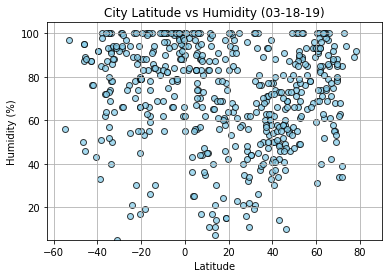

In [48]:
# Latitude VS Humidity
lat=weather_data[["lat"]]
hum=weather_data[["Humidity"]]
plt.scatter(lat, hum, marker="o", facecolors="skyblue", alpha=0.75, edgecolors="black")
plt.axis([-63,90,5,105])

#today1=str(datetime.datetime.today()).split()[0]
today1=datetime.datetime.today().strftime('%m-%d-%y')
plt.grid(True)
plt.title(f"City Latitude vs Humidity ({today1})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

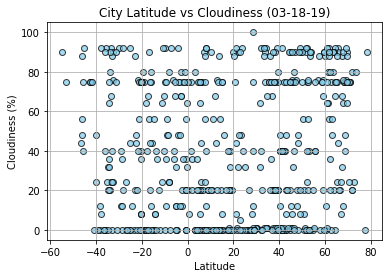

In [49]:
# Latitude VS Cloudiness

lat=weather_data[["lat"]]
cloud=weather_data[["Cloudiness"]]
plt.scatter(lat, cloud, marker="o", facecolors="skyblue", alpha=0.75, edgecolors="black")
#plt.axis([-63,90,5,105])

#today1=str(datetime.datetime.today()).split()[0]
today1=datetime.datetime.today().strftime('%m-%d-%y')
plt.grid(True)
plt.title(f"City Latitude vs Cloudiness ({today1})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

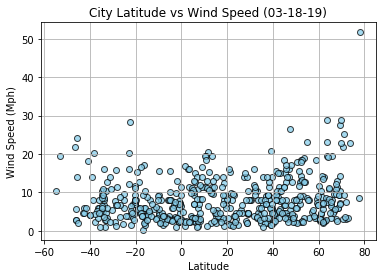

In [50]:
# Latitude VS Max Wind speed

lat=weather_data[["lat"]]
wind=weather_data[["Wind Speed"]]
plt.scatter(lat, wind, marker="o", facecolors="skyblue", alpha=0.75, edgecolors="black")
#plt.axis([-63,90,5,105])

#today1=str(datetime.datetime.today()).split()[0]
today1=datetime.datetime.today().strftime('%m-%d-%y')
plt.grid(True)
plt.title(f"City Latitude vs Wind Speed ({today1})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Mph)")
# Save the figure
plt.savefig("Wind.png")

# Show plot
plt.show()

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


#### Latitude vs. Temperature Plot

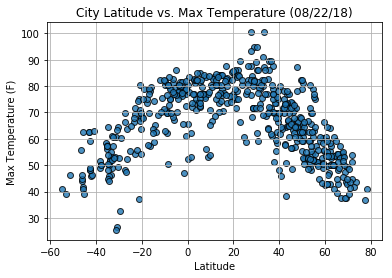

#### Latitude vs. Humidity Plot

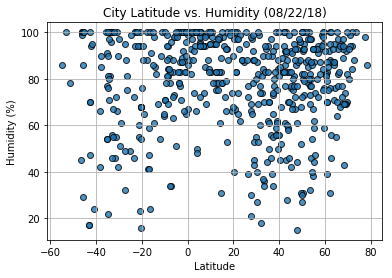

#### Latitude vs. Cloudiness Plot

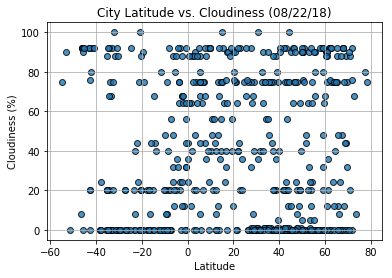

#### Latitude vs. Wind Speed Plot

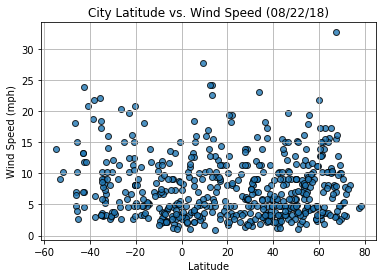